In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('Dataset of Diabetes .csv')
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [2]:
df.replace(to_replace ="P",
                 value ="1", inplace= True)
df.replace(to_replace ="Y",
                 value ="1", inplace= True)
df.replace(to_replace ="N",
                 value ="0", inplace= True)
df.replace(to_replace ="M",
                 value ="0", inplace= True)
df.replace(to_replace ="F",
                 value ="1", inplace= True)
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,397,47514,0,55,2.7,39,11.7,3.9,0.6,1.3,2.3,0.2,30.0,1
495,681,34401,1,58,4.5,53,9.0,5.5,3.2,3.2,1.4,1.5,35.0,1
496,749,34402,0,55,4.1,86,10.0,4.9,0.7,1.2,3.4,0.4,33.0,1
497,321,34403,1,54,2.5,35,10.7,5.6,3.0,1.1,4.2,1.4,39.0,1


In [3]:
new_data= df.drop('CLASS', axis=1)
df_feat=pd.DataFrame(new_data, columns= df.columns[:-1])
df.columns[:-1]

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI'],
      dtype='object')

In [4]:
df_feat.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI'],
      dtype='object')

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df_feat)
scaled_data= scaler.transform(df_feat)
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)


In [6]:
scaled_data.shape

(499, 13)

In [7]:
x_pca.shape

(499, 4)

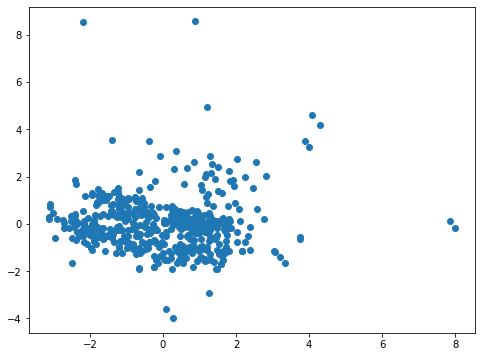

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,2])


In [9]:
pca.components_

array([[-0.12087248, -0.01117871, -0.226907  ,  0.39664118,  0.29435629,
         0.31654609,  0.47653728,  0.10253785,  0.2642724 , -0.03476988,
         0.13845339,  0.22714039,  0.45846928],
       [-0.13418159, -0.09301677, -0.12698824, -0.17984318,  0.50466274,
         0.51301428, -0.29951207,  0.17298438,  0.05676098, -0.08179665,
         0.30276701, -0.20203938, -0.38075466],
       [ 0.24747225,  0.41507145, -0.47656883, -0.35635665,  0.00208212,
         0.0421099 , -0.07227579, -0.18187697, -0.01310319, -0.31090277,
        -0.00148651,  0.52318314, -0.04158884],
       [-0.24759664,  0.0067408 , -0.05244531,  0.0784164 ,  0.28403501,
         0.22345742, -0.0583438 , -0.65163569, -0.24802591,  0.05348138,
        -0.53855423, -0.10643982,  0.0732219 ]])

In [10]:
df_feat.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI'],
      dtype='object')

In [11]:
df_comp=pd.DataFrame(pca.components_, columns= df_feat.columns)
df_comp

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,-0.120872,-0.011179,-0.226907,0.396641,0.294356,0.316546,0.476537,0.102538,0.264272,-0.034770,0.138453,0.227140,0.458469
1,-0.134182,-0.093017,-0.126988,-0.179843,0.504663,0.513014,-0.299512,0.172984,0.056761,-0.081797,0.302767,-0.202039,-0.380755
2,0.247472,0.415071,-0.476569,-0.356357,0.002082,0.042110,-0.072276,-0.181877,-0.013103,-0.310903,-0.001487,0.523183,-0.041589
3,-0.247597,0.006741,-0.052445,0.078416,0.284035,0.223457,-0.058344,-0.651636,-0.248026,0.053481,-0.538554,-0.106440,0.073222


<Figure size 864x432 with 0 Axes>

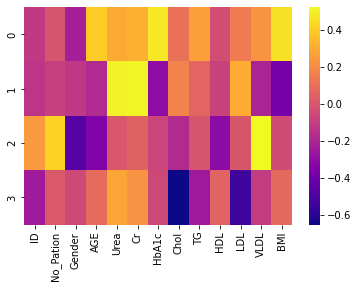

<Figure size 864x432 with 0 Axes>

In [12]:
sns.heatmap(df_comp,cmap='plasma')
plt.figure(figsize=(12,6))

In [13]:
x_pca

array([[-1.97537251, -0.397396  , -1.03004576,  0.95946522],
       [-2.4067268 ,  0.66878137,  1.83611746,  0.32320923],
       [-1.93296092, -0.35082425, -1.11439852,  1.04652906],
       ...,
       [ 0.93327949, -0.67861874,  0.28513891, -0.52501334],
       [ 1.64798264, -1.56090918, -1.13992873, -1.8502201 ],
       [ 0.79771969, -0.19630116,  0.18518545,  0.58701189]])

In [15]:
from sklearn.model_selection import train_test_split
X= x_pca
y=df['CLASS']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
from sklearn.tree import DecisionTreeClassifier
dtree =  DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred=dtree.predict(X_test)
print(pred)

['1' '1' '1' '1' '1' '0' '1' '0' '0' '1' '1' '0' '1' '1' '1' '1' '1' '1'
 '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '0' '1' '0' '1' '1' '0' '1'
 '1' '1' '1' '1' '1' '0' '1' '1' '0' '1' '0' '1' '1' '1' '1' '1' '0' '1'
 '0' '0' '1' '0' '1' '1' '0' '1' '1' '1' '1' '0' '0' '1' '1' '1' '1' '0'
 '1' '1' '1' '0' '1' '0' '1' '0' '1' '1' '0' '0' '1' '0' '1' '0' '0' '0'
 '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '0' '1'
 '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '1' '0' '0'
 '1' '1' '1' '1' '1' '0']


In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 25   7]
 [ 13 105]]
              precision    recall  f1-score   support

           0       0.66      0.78      0.71        32
           1       0.94      0.89      0.91       118

    accuracy                           0.87       150
   macro avg       0.80      0.84      0.81       150
weighted avg       0.88      0.87      0.87       150

